In [1]:
import pandas as pd
import re
import missingno as mso

In [8]:
# Read the csv file
df = pd.read_csv('C:\Language_Projects\Language_Projects\Python\Flagship_1\\automotive_diagnostic_data_cleaning\data\Pre-Screen_Test_Results.csv')

<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_9296\2771380963.py:2: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv('C:\Language_Projects\Language_Projects\Python\Flagship_1\\automotive_diagnostic_data_cleaning\data\Pre-Screen_Test_Results.csv')


In [9]:
# Filter the DataFrame excluding the entry type 'RMA Test Results'
df_prescreen_notes = df[df['Entry Type'].isin(['RMA Pre-Screen', 'Pre-Screen Form Completed'])]

### **DATA CLEANING METHODOLOGY - DUAL FORM PROCESSING STRATEGY**

This section outlines the comprehensive data cleaning approach necessitated by the evolution of diagnostic form structures over time.

#### **🎯 CLEANING RATIONALE**

The diagnostic data requires separation into distinct processing workflows due to fundamental differences in form field structures between data collection systems:

- **Zoho CRM Form**: Maintains consistent field structure over time
- **Google Form**: Has undergone multiple field updates and modifications

#### **📋 PROCESSING APPROACH**

##### **🔧 Zoho Form Data Processing**
- **Method**: Regex-based extraction from unstructured Notes field
- **Advantage**: Consistent field delimiters enable reliable pattern matching
- **Fields Extracted**:
  - Original Problems: `r'experienced with customers original unit:\s*(.*?)(?=DTCs on original unit)'`
  - Original DTCs: `r'DTCs on original unit:(.*?)(?=DTCs transcript)'`
  - FS1 ECU Problems: `r'Problems experienced with our unit:(.*?)(?=DTCs on our unit:)'`
  - FS1 DTCs: `r'DTCs on our unit:(.*?)(?=DTCs transcript)'`
  - Problems Related: `r'Are the original and current problems related.*?(Yes|No|Uncertain)'`
  - Additional Notes: `r'Additional Notes/Testing Recommendations?\s*(.*?)(?=Resolution:)'`
  - Resolution: `r'Resolution:\s*(.*?)(?=\n\n|$)'`

##### **🔧 Google Form Data Processing**
- **Challenge**: Field structure inconsistencies prevent reliable regex extraction
- **Solution**: Utilize pre-structured secondary dataset
- **Method**: Cross-reference and map structured data from auxiliary spreadsheet
- **Data Source**: `prescreen_google_form.xlsx` containing pre-separated diagnostic fields

#### **📊 EXPECTED OUTCOMES**

- Unified dataset with consistently structured diagnostic fields
- Elimination of unstructured Notes dependency for Google Form data
- Enhanced data quality for downstream analytical processes
- Maintained data lineage and traceability

This dual-processing approach ensures optimal data extraction while accommodating the evolutionary changes in diagnostic form structures over the operational timeline.

In [10]:
# Create a new dataframe with only the prescreen notes done with the Google form
df_google_form_filtered_from_main_df = df_prescreen_notes[df_prescreen_notes['Entry Type'] == 'RMA Pre-Screen']

In [11]:
# Check the df after filtering
df_google_form_filtered_from_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 0 to 8387
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Created Time  1762 non-null   object 
 1   H Number      1762 non-null   object 
 2   Entry Type    1762 non-null   object 
 3   Technician    1710 non-null   object 
 4   Source        1762 non-null   object 
 5   Year          1762 non-null   float64
 6   Make          1762 non-null   object 
 7   Model         1762 non-null   object 
 8   Engine Size   1713 non-null   object 
 9   HW #          1529 non-null   object 
 10  Part #        1655 non-null   object 
 11  Notes         1716 non-null   object 
dtypes: float64(1), object(11)
memory usage: 179.0+ KB


In [13]:
# This spreadsheet has the prescreen notes separated by column.
# Instead of extracting the information from the main df 'df_google_form_filtered', the following concatenates the data from this dataframe to the df_google_form
df_google_form_spdsht = pd.read_excel('C:\Language_Projects\Language_Projects\Python\Flagship_1\\automotive_diagnostic_data_cleaning\data\prescreen_google_form.xlsx')

<>:3: SyntaxWarning: invalid escape sequence '\L'
<>:3: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_9296\3851165866.py:3: SyntaxWarning: invalid escape sequence '\L'
  df_google_form_spdsht = pd.read_excel('C:\Language_Projects\Language_Projects\Python\Flagship_1\\automotive_diagnostic_data_cleaning\data\prescreen_google_form.xlsx')


In [14]:
# Confirming the column names
df_google_form_spdsht.columns

Index(['Timestamp', 'Technician', 'Acct. #', 'Unnamed: 3',
       'Is this a replacement?', 'Year', 'Make', 'Model', 'Engine Size', 'VIN',
       'Module Type', 'Service Provided', 'Original Problem(s)',
       'DTCs on original unit', 'Current Problem(s)', 'DTCs on our unit',
       'Problems Related?', 'Diagnosed properly by Customer?',
       'Additional Notes', 'Resolution:', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Timestamp for assignment log'],
      dtype='object')

In [15]:
# Drop some unnecessary columns
df_google_form_spdsht_dropped_columns = df_google_form_spdsht.drop(columns=['Unnamed: 3', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Timestamp for assignment log'])

In [16]:
# Rename the column "Acct. #" for "H Number" to match the main df
df_google_form_spdsht_renamed_column = df_google_form_spdsht_dropped_columns.rename(columns={'Acct. #': 'H Number'})

In [17]:
# Print the dataframe information after cleaning
df_google_form_spdsht_renamed_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7025 entries, 0 to 7024
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        7025 non-null   object
 1   Technician                       7025 non-null   object
 2   H Number                         7025 non-null   object
 3   Is this a replacement?           7025 non-null   object
 4   Year                             7025 non-null   int64 
 5   Make                             7025 non-null   object
 6   Model                            7025 non-null   object
 7   Engine Size                      7005 non-null   object
 8   VIN                              6994 non-null   object
 9   Module Type                      7015 non-null   object
 10  Service Provided                 6995 non-null   object
 11  Original Problem(s)              7012 non-null   object
 12  DTCs on original unit            6

In [18]:
# The column 'Service Provided' confirms if there are H numbers that need to be removed.
# After checking the service type, the ones that need to be removed are:
# Repair
# Testing
df_google_form_spdsht_renamed_column['Service Provided'].value_counts()

Service Provided
Programming                     6188
Virginized/Reset Immobilizer     307
Part Number/Sticker Check        250
Cloning                          128
Repair                           120
Testing                            2
Name: count, dtype: int64

In [19]:
# Filter the dataframe with only the service types needed 
df_google_form_spdsht_servtype_needed = df_google_form_spdsht_renamed_column[df_google_form_spdsht_renamed_column['Service Provided'].isin(['Programming', 'Virginized/Reset Immobilizer', 'Part Number/Sticker Check', 'Cloning'])]

In [20]:
# Check mark with bool values the accounts that matches in the main df
df_google_form_spdsht_servtype_needed['H Number in Google Form'] = df_google_form_spdsht_servtype_needed['H Number'].isin(df_google_form_filtered_from_main_df['H Number'])

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_9296\1129379814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_spdsht_servtype_needed['H Number in Google Form'] = df_google_form_spdsht_servtype_needed['H Number'].isin(df_google_form_filtered_from_main_df['H Number'])


In [21]:
# Check the value counts of the new column
df_google_form_spdsht_servtype_needed['H Number in Google Form'].value_counts()

H Number in Google Form
False    6553
True      320
Name: count, dtype: int64

In [22]:
# Create a df with the accounts matching both dfs
df_google_form_spdsht_matches = df_google_form_spdsht_servtype_needed[df_google_form_spdsht_servtype_needed['H Number in Google Form'].isin([True])]

In [23]:
# Check mark with bool values the duplicated accounts
df_google_form_spdsht_matches['Duplicated Acc'] = df_google_form_spdsht_matches.duplicated(subset='H Number') 

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_9296\3425039679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_spdsht_matches['Duplicated Acc'] = df_google_form_spdsht_matches.duplicated(subset='H Number')


In [24]:
# Count the duplicated accounts
df_google_form_spdsht_matches['Duplicated Acc'].value_counts()

Duplicated Acc
False    290
True      30
Name: count, dtype: int64

### **DUPLICATE ACCOUNT MANAGEMENT**

#### **🎯 REMOVAL STRATEGY**

Duplicated accounts will be removed from the dataset due to:

- **Low Volume Impact**: Duplicates represent a minimal percentage of total records
- **Processing Efficiency**: Removal avoids unnecessary data cleaning effort 
- **Quality Assurance**: Maintains clean, unique records for reliable analysis

This approach prioritizes analytical efficiency while maintaining data quality without significant information loss.

In [25]:
# Filter only accounts not duplicated and disregard the duplicates 
df_google_form_spdsht_wo_duplicates = df_google_form_spdsht_matches[df_google_form_spdsht_matches['Duplicated Acc'] == False]

In [26]:
# Check the info from the df
df_google_form_spdsht_wo_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 25 to 6996
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        290 non-null    object
 1   Technician                       290 non-null    object
 2   H Number                         290 non-null    object
 3   Is this a replacement?           290 non-null    object
 4   Year                             290 non-null    int64 
 5   Make                             290 non-null    object
 6   Model                            290 non-null    object
 7   Engine Size                      289 non-null    object
 8   VIN                              290 non-null    object
 9   Module Type                      290 non-null    object
 10  Service Provided                 290 non-null    object
 11  Original Problem(s)              289 non-null    object
 12  DTCs on original unit            217 no

In [27]:
# Drop no needed columns
df_google_form_spdsht_dropped_cols = df_google_form_spdsht_wo_duplicates.drop(columns=['H Number in Google Form', 'Duplicated Acc'])

In [28]:
# Check the info after removing the columns
df_google_form_spdsht_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 25 to 6996
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        290 non-null    object
 1   Technician                       290 non-null    object
 2   H Number                         290 non-null    object
 3   Is this a replacement?           290 non-null    object
 4   Year                             290 non-null    int64 
 5   Make                             290 non-null    object
 6   Model                            290 non-null    object
 7   Engine Size                      289 non-null    object
 8   VIN                              290 non-null    object
 9   Module Type                      290 non-null    object
 10  Service Provided                 290 non-null    object
 11  Original Problem(s)              289 non-null    object
 12  DTCs on original unit            217 no

In [29]:
# Check the info from the main df
df_google_form_filtered_from_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 0 to 8387
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Created Time  1762 non-null   object 
 1   H Number      1762 non-null   object 
 2   Entry Type    1762 non-null   object 
 3   Technician    1710 non-null   object 
 4   Source        1762 non-null   object 
 5   Year          1762 non-null   float64
 6   Make          1762 non-null   object 
 7   Model         1762 non-null   object 
 8   Engine Size   1713 non-null   object 
 9   HW #          1529 non-null   object 
 10  Part #        1655 non-null   object 
 11  Notes         1716 non-null   object 
dtypes: float64(1), object(11)
memory usage: 179.0+ KB


#### **🔄 INTEGRATION STRATEGY**

As observed above, the main `df_google_form_filtered_from_main_df` contains over 1,500 rows with diagnostic data from multiple Google Forms. However, the secondary dataframe does not contain all accounts, but only a subset of them. Since diagnostic data extraction is not feasible due to updated field structures in Google Forms, a **merge operation** will be performed to concatenate data from the secondary dataframe to the main dataframe.

**Process:**
- Cross-reference account numbers between both dataframes
- Map structured diagnostic fields from secondary dataset to main dataset  
- Fill empty diagnostic columns through controlled data transfer
- Maintain data integrity during the merge operation

This approach leverages the pre-structured data availability to bypass complex regex extraction challenges while ensuring complete diagnostic information integration.

In [30]:
# Before merging the data from the secondary df to the main df, check mark the main df with the accounts that match on both dfs,
# so that the accounts that do not match will be disregarded.   
df_google_form_filtered_from_main_df['H Number True'] = df_google_form_filtered_from_main_df['H Number'].isin(df_google_form_spdsht_dropped_cols['H Number'])

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_9296\1576423565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google_form_filtered_from_main_df['H Number True'] = df_google_form_filtered_from_main_df['H Number'].isin(df_google_form_spdsht_dropped_cols['H Number'])


In [31]:
# Filter only the accounts which match both dfs
df_main_google_form_true = df_google_form_filtered_from_main_df[df_google_form_filtered_from_main_df['H Number True'] == True]

In [32]:
# Check the data from main df after filtering only the accounts that match with the secondary df
df_main_google_form_true.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 1 to 8377
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created Time   352 non-null    object 
 1   H Number       352 non-null    object 
 2   Entry Type     352 non-null    object 
 3   Technician     335 non-null    object 
 4   Source         352 non-null    object 
 5   Year           352 non-null    float64
 6   Make           352 non-null    object 
 7   Model          352 non-null    object 
 8   Engine Size    341 non-null    object 
 9   HW #           307 non-null    object 
 10  Part #         339 non-null    object 
 11  Notes          352 non-null    object 
 12  H Number True  352 non-null    bool   
dtypes: bool(1), float64(1), object(11)
memory usage: 36.1+ KB


#### **🔧 Column Management for Merge Operation**

The main dataframe contains only the Notes column with diagnostic data, while the first columns (technician, date, and vehicle data) exist in both dataframes. To perform the merge without creating additional columns that pandas `merge()` generates, the duplicate columns present in both dataframes will be deleted before the merge operation.

**Secondary DataFrame Structure**: Will retain only the H Number column and diagnostic data columns (Original Problems, Original DTCs, FS1 Problems, FS1 DTCs, etc.), while all duplicate metadata columns will be removed.

**Rationale**: Prevents column duplication and maintains clean data structure during the integration process.

In [33]:
# Check the columns available on the secondary df
df_google_form_spdsht_dropped_cols.columns

Index(['Timestamp', 'Technician', 'H Number', 'Is this a replacement?', 'Year',
       'Make', 'Model', 'Engine Size', 'VIN', 'Module Type',
       'Service Provided', 'Original Problem(s)', 'DTCs on original unit',
       'Current Problem(s)', 'DTCs on our unit', 'Problems Related?',
       'Diagnosed properly by Customer?', 'Additional Notes', 'Resolution:'],
      dtype='object')

In [34]:
# Create a list with columns that WILL NOT BE deleted on the secondary df
spdsht_keep_cols_list = [
    'H Number', 'Original Problem(s)', 'DTCs on original unit',
    'Current Problem(s)', 'DTCs on our unit', 'Problems Related?',
    'Diagnosed properly by Customer?', 'Additional Notes', 'Resolution:'
    ]

In [35]:
# List with cols WILL BE DELETED on the secondary df
spdsht_delete_cols_list = []

# Loop to iterate under the columns
for col in df_google_form_spdsht_dropped_cols.columns:
    # Condition to confirm if the columns are not in the keep columns list
    if col not in spdsht_keep_cols_list:
        # Append the columns will be deleted
        spdsht_delete_cols_list.append(col)

In [36]:
# Print the colums WILL BE DELETED
spdsht_delete_cols_list

['Timestamp',
 'Technician',
 'Is this a replacement?',
 'Year',
 'Make',
 'Model',
 'Engine Size',
 'VIN',
 'Module Type',
 'Service Provided']

In [37]:
# Drop the columns appened above
df_sec_spdsht_drop_diag_cols = df_google_form_spdsht_dropped_cols.drop(columns=spdsht_delete_cols_list)

In [38]:
# Check the columns after dropping
df_sec_spdsht_drop_diag_cols.columns

Index(['H Number', 'Original Problem(s)', 'DTCs on original unit',
       'Current Problem(s)', 'DTCs on our unit', 'Problems Related?',
       'Diagnosed properly by Customer?', 'Additional Notes', 'Resolution:'],
      dtype='object')

In [39]:
# Merge main df with secondary df 
df_main_sec_merged = pd.merge(df_main_google_form_true, df_sec_spdsht_drop_diag_cols, on='H Number', how='outer')

In [40]:
# Check the columns avaible after merging
df_main_sec_merged.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #', 'Notes',
       'H Number True', 'Original Problem(s)', 'DTCs on original unit',
       'Current Problem(s)', 'DTCs on our unit', 'Problems Related?',
       'Diagnosed properly by Customer?', 'Additional Notes', 'Resolution:'],
      dtype='object')

In [41]:
# This map will be used to rename the columns 
col_mapping = {
    'Original Problem(s)': 'Original Problems', 
    'DTCs on original unit': 'Original DTCs',
    'Current Problem(s)': 'FS1 ECU Problems', 
    'DTCs on our unit': 'FS1 ECU DTCs', 
    'Problems Related?': 'Are the problems related'
}

In [42]:
# Remane the columns to the standard names using the above 
df_main_sec_merged.rename(columns=col_mapping, inplace=True)

In [43]:
# Print the columns to confirm the changes
df_main_sec_merged.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #', 'Notes',
       'H Number True', 'Original Problems', 'Original DTCs',
       'FS1 ECU Problems', 'FS1 ECU DTCs', 'Are the problems related',
       'Diagnosed properly by Customer?', 'Additional Notes', 'Resolution:'],
      dtype='object')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **🔧 Post-Merge Data Processing**

After merging part of the data from the secondary dataframe to the main dataframe, the accounts that are not in the secondary dataframe will now be processed.

In [44]:
# Filter the accounts DO NOT MATCH both dfs (main vs secondary)
df_main_not_match_sec_df = df_google_form_filtered_from_main_df[df_google_form_filtered_from_main_df['H Number True'] == False]

In [45]:
# Remove the null values from column notes
df_main_not_match_sec_df_rm_null = df_main_not_match_sec_df.dropna(subset=['Notes'])

In [46]:
# Check the info 
df_main_not_match_sec_df_rm_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 0 to 8387
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created Time   1364 non-null   object 
 1   H Number       1364 non-null   object 
 2   Entry Type     1364 non-null   object 
 3   Technician     1329 non-null   object 
 4   Source         1364 non-null   object 
 5   Year           1364 non-null   float64
 6   Make           1364 non-null   object 
 7   Model          1364 non-null   object 
 8   Engine Size    1326 non-null   object 
 9   HW #           1182 non-null   object 
 10  Part #         1271 non-null   object 
 11  Notes          1364 non-null   object 
 12  H Number True  1364 non-null   bool   
dtypes: bool(1), float64(1), object(11)
memory usage: 139.9+ KB


### **🔍 GOOGLE FORM DATA FILTERING STRATEGY**

This dataset contains mixed diagnostic entries including Google Form prescreens, updated accounts with additional information, and non-Google Form prescreens. To streamline diagnostic data extraction, only accounts prescreened using Google Forms will be processed, leveraging regex patterns and standardized form fields. The string "DTCs present" appears in all Google Form entries, therefore rows without this identifier will be excluded from the dataset.

In [47]:
# Find the rows prescreened using the google form and use the string DTCs present to find them
df_googl_form_second_extrac = df_main_not_match_sec_df_rm_null['Notes'].str.findall(r'DTCs?\s+present')

In [48]:
# List to append the indexes
dtc_pres_str_idx_list = []

# Iterate over series to get the indexes
for idx, matches in df_googl_form_second_extrac.items():
    # Condition when is found
    if matches:
        dtc_pres_str_idx_list.append(idx)

In [49]:
# Check mark the rows which have the string DTCs present in the main df
df_main_not_match_sec_df_rm_null['Index w/ Str True'] = df_main_not_match_sec_df_rm_null.index.isin(dtc_pres_str_idx_list)

C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_9296\1179785714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_not_match_sec_df_rm_null['Index w/ Str True'] = df_main_not_match_sec_df_rm_null.index.isin(dtc_pres_str_idx_list)


In [50]:
# Create a df with only the accounts prescreened with google form (or the ones that has the string 'DTC Present')
df_prescre_googl_form = df_main_not_match_sec_df_rm_null[df_main_not_match_sec_df_rm_null['Index w/ Str True'] == True] 

In [51]:
# Print one of the rows to confirm the google form fields pattern
print(df_prescre_googl_form['Notes'][6])

Problem(s) experienced with the original unit: Transmission j1850 not found
DTCs present with original unit:
J1850 no transmission
Problem(s) experienced with the unit we've provided: Rough startup ,
rough idle, horrible white smoke at first then black smoke which never
happened before
DTCs present with unit we've provided:
P0606 PCM Processor Fault
P2146 Fuel Injector Group "A" Supply Voltage Circuit/Open
P0480 Cooling Fan I Control Circuit Malfunction
P2149 Fuel Injector Group "B" Supply Voltage Circuit/Open
Are the original and current problems related? No
Were the appropriate diagnostic steps followed? Not Sure/Inconclusive
Additional Notes:
Resolution: Return unit to testing department


### **📋 GOOGLE FORM FIELD VALIDATION**

#### **🎯 STANDARD FORM STRUCTURE**
Google Form entries contain the following standardized fields:
- Problem(s) experienced with the original unit
- DTCs present with original unit  
- Problem(s) experienced with the unit we've provided
- DTCs present with unit we've provided
- Are the original and current problems related?

#### **🔧 VALIDATION APPROACH**
A validation function will be created to confirm all rows contain these identical fields. Form updates over time may have altered field structures, potentially preventing regex extraction from capturing data in some rows. This validation ensures consistent field presence across all Google Form entries before proceeding with data extraction.

In [52]:
# Function to create a series with the rows containing the field based on the pattern
def confirm_google_form_field(df, pattern):
    # Create a series with the rows that contains the field
    ser_field = df['Notes'].str.contains(pattern, case=False, na=False)
    # Return the rows counted
    return ser_field.sum()

### FIELD: Problem(s) experienced with the original unit

In [53]:
# Create a pattern
original_problems_field_pattern = r'experienced\s+with\s+the\s+original\s+unit'

In [54]:
# Call the function to count the rows with the google form field
confirm_google_form_field(df_prescre_googl_form, original_problems_field_pattern)

np.int64(262)

### FIELD: DTCs present with original unit

In [55]:
# Create a pattern
original_dtcs_field_pattern = r'DTCs\s+present\s+with\s+original\s+unit' 

In [56]:
# Call the function to count the rows with the google form field
confirm_google_form_field(df_prescre_googl_form, original_dtcs_field_pattern)

np.int64(262)

### FIELD: Problem(s) experienced with the unit we've provided

In [57]:
# Create a pattern
fs1_problems_field_pattern = r'experienced\s+with\s+the\s+unit\s+we' 

In [58]:
# Call the function to count the rows with the google form field
confirm_google_form_field(df_prescre_googl_form, fs1_problems_field_pattern)

np.int64(262)

### FIELD: DTCs present with unit we've provided

In [59]:
# Create a pattern
fs1_dtcs_field_pattern = r'DTCs\s+present\s+with\s+unit\s+we' 

In [60]:
# Call the function to count the rows with the google form field
confirm_google_form_field(df_prescre_googl_form, fs1_dtcs_field_pattern)

np.int64(262)

In [61]:
# Create a pattern
problems_related_field_pattern = r'the\s+original\s+and\s+current\s+problems\s+related' 

In [62]:
# Call the function to count the rows with the google form field
confirm_google_form_field(df_prescre_googl_form, problems_related_field_pattern)

np.int64(262)

In [63]:
# Check the df info
df_prescre_googl_form.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 6 to 8387
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Created Time       263 non-null    object 
 1   H Number           263 non-null    object 
 2   Entry Type         263 non-null    object 
 3   Technician         260 non-null    object 
 4   Source             263 non-null    object 
 5   Year               263 non-null    float64
 6   Make               263 non-null    object 
 7   Model              263 non-null    object 
 8   Engine Size        256 non-null    object 
 9   HW #               237 non-null    object 
 10  Part #             234 non-null    object 
 11  Notes              263 non-null    object 
 12  H Number True      263 non-null    bool   
 13  Index w/ Str True  263 non-null    bool   
dtypes: bool(2), float64(1), object(11)
memory usage: 35.3+ KB


### **📊 FIELD VALIDATION RESULTS**

The field validation reveals **262 matches out of 263 total dataframe indices**, indicating that **99.6% of rows contain identical Google Form field structures**. This near-perfect consistency confirms that the vast majority of entries follow standardized Google Form patterns, enabling reliable implementation of regex-based extraction processes. The row that does not contain the standard Google Form field structure will be identified and excluded from the dataset.

In [64]:
# Check which rows do not contain the google form fields  
ser_no_googl_form = df_prescre_googl_form['Notes'].str.contains(original_problems_field_pattern, case=False, na=False)

In [65]:
# Check which index DOES NOT contain the google form fields to be deleted
ser_no_googl_form[ser_no_googl_form == False]

2857    False
Name: Notes, dtype: bool

In [66]:
# Check the columns available to drop no needed columns and the above index
df_prescre_googl_form.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #', 'Notes',
       'H Number True', 'Index w/ Str True'],
      dtype='object')

In [67]:
# Drop the above row and no needed columns
df_prescre_googl_form_dropped_col_idx = df_prescre_googl_form.drop(columns=[ 'H Number True', 'Index w/ Str True'], index=[2857])

In [68]:
# Check the df info ro confirm the changes
df_prescre_googl_form_dropped_col_idx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 6 to 8387
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Created Time  262 non-null    object 
 1   H Number      262 non-null    object 
 2   Entry Type    262 non-null    object 
 3   Technician    259 non-null    object 
 4   Source        262 non-null    object 
 5   Year          262 non-null    float64
 6   Make          262 non-null    object 
 7   Model         262 non-null    object 
 8   Engine Size   255 non-null    object 
 9   HW #          236 non-null    object 
 10  Part #        233 non-null    object 
 11  Notes         262 non-null    object 
dtypes: float64(1), object(11)
memory usage: 26.6+ KB


In [69]:
def extract_information(df, pattern, col_name, len_size_col):
    '''Extract data: symptoms, 
    dtcs and strings from column notes'''
    ser_zoho_form_data_extracted = df['Notes'].str.extract(pattern, flags=re.IGNORECASE | re.DOTALL)
    # Rename column from 0 to the related info extracted
    zoho_form_data_extracted_renamed_column = ser_zoho_form_data_extracted.rename(columns={0: col_name})
    # Replace chars, whitespaces and no needed info from the data extracted
    zoho_form_data_extracted_no_chars = zoho_form_data_extracted_renamed_column[col_name].str.replace(r'<[^>]+>|\n|:|=|\?|\\|\/|\r', '', regex=True).str.strip()
    # Update the main df with the extracted data
    df[col_name] = zoho_form_data_extracted_no_chars
        
    '''Method to create a list with the data extracted to check if the field names were not included in the extraction'''
    # List with the string sizes
    string_size_list = []

    # Loop to iterate under the original problems column
    for string in df[col_name]:
        # Make all the data will be converted to strings
        to_string = str(string)
        # Count the strings' length
        string_length = len(to_string)
        # Append the length to the list
        string_size_list.append(string_length)

    # Add to the main df a column with length of the data extracted
    df[len_size_col] = string_size_list

    return df

In [70]:
# Small function to get the index with the biggest string lengths
def get_index_w_biggest_len(df, col, str_length):
    # Return the index
    return df[df[col] == str_length].index

In [71]:
# Small function to confirm the content of the string
def string_content(df, col, idx):
    return df[col][idx]

ORIGINAL PROBLEMS GOOGLE FORM EXTRACTION

In [72]:
# Create the pattern to extract the original problems
original_problems_pattern = r'experienced with the original unit:\s*(.*?)(?=DTCs present with original)'

In [73]:
# Call the function to extract the original problems
df_original_problems_extracted = extract_information(df_prescre_googl_form_dropped_col_idx, original_problems_pattern, 'Original Problems', 'Original Problems Len')

### Checking the content of the biggest string and confirm if the field string were not extracted.

In [74]:
# Show an ascending stat with the original problems string length
df_original_problems_extracted['Original Problems Len'].value_counts()

Original Problems Len
34     11
8      10
33      9
19      8
12      7
       ..
60      1
70      1
93      1
163     1
111     1
Name: count, Length: 97, dtype: int64

## Samples with the biggest string lengths

In [75]:
# List with the biggest strings
orig_pro_biggest_strings_list = []

In [76]:
orig_pro_biggest_strings_list.append(get_index_w_biggest_len(df_original_problems_extracted, 'Original Problems Len', 70))

In [77]:
orig_pro_biggest_strings_list.append(get_index_w_biggest_len(df_original_problems_extracted, 'Original Problems Len', 93))

In [78]:
orig_pro_biggest_strings_list.append(get_index_w_biggest_len(df_original_problems_extracted, 'Original Problems Len', 163))

In [79]:
orig_pro_biggest_strings_list.append(get_index_w_biggest_len(df_original_problems_extracted, 'Original Problems Len', 111))

In [80]:
# Print the list with the biggest strings appended
orig_pro_biggest_strings_list

[Index([8035], dtype='int64'),
 Index([8349], dtype='int64'),
 Index([8352], dtype='int64'),
 Index([8387], dtype='int64')]

## Check the content of the string to confirm if the form fields were not extracted

In [81]:
string_content(df_original_problems_extracted, 'Original Problems', 8035)

'no start, fuse# 14blown,  no signal from halo around the ignition area'

In [82]:
string_content(df_original_problems_extracted, 'Original Problems', 8349)

'Unit would start and stall, It would shut down while running, occasionally it will only crank'

In [83]:
string_content(df_original_problems_extracted, 'Original Problems', 8352)

'The original computer wound set multiple codes randomly and intermittently. It would run fine and all of a sudden it would just start idle surging and other stuff.'

In [84]:
string_content(df_original_problems_extracted, 'Original Problems', 8387)

'No start, no spark andno injector, no check engine light, but when you turn on the key, themain relay comes on.'

## Content of the original problems extracted are correct

ORIGINAL DTCs GOOGLE FORM EXTRACTION

In [85]:
# Create the pattern to extract the original DTCs
original_dtcs_pattern = r'DTCs present with original unit:(.*?)(?=Problem\(s\) experienced with the unit we)'

In [86]:
# Call the function to extract the original DTCs
df_original_dtcs_extracted = extract_information(df_prescre_googl_form_dropped_col_idx, original_dtcs_pattern, 'Original DTCs', 'Orig. DTCs Len')

In [87]:
# Show an ascending stat with the original dtcs string length
df_original_dtcs_extracted['Orig. DTCs Len'].value_counts()

Orig. DTCs Len
12     49
4      14
18     11
7      10
17      8
       ..
289     1
19      1
96      1
489     1
452     1
Name: count, Length: 89, dtype: int64

## Samples with the biggest string lengths: ORIGINAL DTCs

In [88]:
# List with the biggest strings
list_w_biggest_strings_orig_dtcs = []

In [89]:
list_w_biggest_strings_orig_dtcs.append(get_index_w_biggest_len(df_original_dtcs_extracted, 'Orig. DTCs Len', 289))

In [90]:
list_w_biggest_strings_orig_dtcs.append(get_index_w_biggest_len(df_original_dtcs_extracted, 'Orig. DTCs Len', 489))

In [91]:
list_w_biggest_strings_orig_dtcs.append(get_index_w_biggest_len(df_original_dtcs_extracted, 'Orig. DTCs Len', 452))

In [92]:
list_w_biggest_strings_orig_dtcs.append(get_index_w_biggest_len(df_original_dtcs_extracted, 'Orig. DTCs Len', 86))

In [93]:
# Print the list with the biggest strings appended
list_w_biggest_strings_orig_dtcs

[Index([8172], dtype='int64'),
 Index([8352], dtype='int64'),
 Index([8354], dtype='int64'),
 Index([4198], dtype='int64')]

## Check the content of the string to confirm if the form fields were not extracted

In [94]:
string_content(df_original_dtcs_extracted, 'Original DTCs', 8172)

'p0714 Transmission Fluid Temperature Sensor "A" Circuit Intermittent, p0218 Transmission over temperature condition, p0706 Transmission Range Sensor "A" Circuit RangePerformance, p1604 PCM Internal Dual-Port RAM ReadWrite Integrity Failure, p0700  Transmission Control System (MIL Request)'

In [95]:
string_content(df_original_dtcs_extracted, 'Original DTCs', 8352)

'P2229 Barometric Pressure Sensor "A" Circuit HighP0050 HO2S Heater Control Circuit (Bank 2 Sensor 1)P0051 HO2S Heater Control Circuit Low (Bank 2 Sensor 1)P0097 Intake Air Temperature Sensor 2 Circuit Low Bank 1P00F4 Intake Air Humidity Sensor Circuit Low VoltageP0102 Mass or Volume Air Flow "A" Circuit Low InputP0113 Intake Air Temperature Circuit High Input Bank 1P0155 02 Sensor Heater Circuit Malfunction (Bank 2 Sensor 1)P2227 Barometric Pressure Sensor "A" Circuit RangePerformance'

In [96]:
string_content(df_original_dtcs_extracted, 'Original DTCs', 8354)

'PO443 Evaporative Emission Control System Purge Control Valve CircuitP3443 Cylinder 6 DeactivationIntake Valve Control Circuit LowP3419 Cylinder 3 DeactivationIntake Valve Control Circuit LowP0485 Cooling Fan PowerGround Circuit MalfunctionP0051 HO2S Heater Control Circuit Low (Bank 2 Sensor 1)P0050 HO2S Heater Control Circuit (Bank 2 Sensor 1)P0031 HO2S Heater Control Circuit Low (Bank 1 Sensor 1)P0030 HO2S Heater Control Circuit (Bank 1 Sensor 1)'

In [97]:
string_content(df_original_dtcs_extracted, 'Original DTCs', 4198)

'P0128 Coolant Thermostat (Coolant Temperature Below Thermostat Regulating Temperature)'

## Content of the original dtcs extracted are correct

FS1 ECU PROBLEMS GOOGLE FORM EXTRACTION

In [98]:
# Create the pattern to extract the fs1 problems
fs1_problems_pattern = r'Problem\(s\) experienced with the unit we\'ve provided(.*?)(?=DTCs present with unit we)'

In [99]:
# Call the function to extract the FS1 ECU problems
df_fs1_problems_extracted = extract_information(df_prescre_googl_form_dropped_col_idx, fs1_problems_pattern, 'FS1 ECU Problems', 'FS1 Problems Len')

In [100]:
# Show an ascending stat with the fs1 comp. problems string length
df_fs1_problems_extracted['FS1 Problems Len'].value_counts()

FS1 Problems Len
19     11
8       8
42      8
32      7
39      7
       ..
115     1
79      1
147     1
10      1
152     1
Name: count, Length: 104, dtype: int64

## Samples with the biggest string lengths

In [101]:
# List with the biggest strings
list_w_biggest_strings_fs1_problems = []

In [102]:
list_w_biggest_strings_fs1_problems.append(get_index_w_biggest_len(df_fs1_problems_extracted, 'FS1 Problems Len', 115))

In [103]:
list_w_biggest_strings_fs1_problems.append(get_index_w_biggest_len(df_fs1_problems_extracted, 'FS1 Problems Len', 79))

In [104]:
list_w_biggest_strings_fs1_problems.append(get_index_w_biggest_len(df_fs1_problems_extracted, 'FS1 Problems Len', 147))

In [105]:
list_w_biggest_strings_fs1_problems.append(get_index_w_biggest_len(df_fs1_problems_extracted, 'FS1 Problems Len', 152))

In [106]:
# Print the list with the biggest strings appended
list_w_biggest_strings_fs1_problems

[Index([7204], dtype='int64'),
 Index([8154], dtype='int64'),
 Index([8159], dtype='int64'),
 Index([8387], dtype='int64')]

### Checking the content of the biggest string and confirm if the field string were not extracted.

In [107]:
string_content(df_fs1_problems_extracted, 'FS1 ECU Problems', 7204)

'Charging System,alternator is charging only 11.9 volts. Check engine light and checkgauges message on the dashboard'

In [108]:
string_content(df_fs1_problems_extracted, 'FS1 ECU Problems', 8154)

'a key relearn was performed, unknow which one, they could not program the keys.'

In [109]:
string_content(df_fs1_problems_extracted, 'FS1 ECU Problems', 8159)

'ImmobilizerSecurity, a key relearn was performed, the vehicle does not start. They plugged back the original computer, the vehicle starts right up.'

In [110]:
string_content(df_fs1_problems_extracted, 'FS1 ECU Problems', 8387)

'No response fromthe new module, it would not even turn on the main relay. When thecustomer jumps the main relay it has ignition but code for VINmismatch'

## Content of the fs1 ecu problems extracted are correct

FS1 ECU DTCs GOOGLE FORM EXTRACTION

In [111]:
# Create the pattern to extract the fs1 module dtcs
fs1_dtcs_pattern = r'DTCs present with unit we\'ve provided(.*?)(?=Are the original and current problems related)'

In [112]:
# Call the function to extract the FS1 ECU DTCs
df_fs1_dtcs_extracted = extract_information(df_prescre_googl_form_dropped_col_idx, fs1_dtcs_pattern, 'FS1 ECU DTCs', 'FS1 DTCs Len')

In [113]:
# Show an ascending stat with the fs1 comp. problems string length
df_fs1_dtcs_extracted['FS1 DTCs Len'].value_counts()

FS1 DTCs Len
12     44
99     15
8      11
17      9
7       8
       ..
109     1
166     1
213     1
116     1
236     1
Name: count, Length: 98, dtype: int64

## Samples with the biggest string lengths

In [114]:
# List with the biggest strings
list_w_biggest_strings_fs1_dtcs = []

In [115]:
list_w_biggest_strings_fs1_dtcs.append(get_index_w_biggest_len(df_fs1_dtcs_extracted, 'FS1 DTCs Len', 166))

In [116]:
list_w_biggest_strings_fs1_dtcs.append(get_index_w_biggest_len(df_fs1_dtcs_extracted, 'FS1 DTCs Len', 213))

In [117]:
list_w_biggest_strings_fs1_dtcs.append(get_index_w_biggest_len(df_fs1_dtcs_extracted, 'FS1 DTCs Len', 236))

In [118]:
list_w_biggest_strings_fs1_dtcs.append(get_index_w_biggest_len(df_fs1_dtcs_extracted, 'FS1 DTCs Len', 116))

In [119]:
# Print the list with the biggest strings appended
list_w_biggest_strings_fs1_dtcs

[Index([8163], dtype='int64'),
 Index([8280], dtype='int64'),
 Index([8354], dtype='int64'),
 Index([8349], dtype='int64')]

### Checking the content of the biggest string and confirm if the field string were not extracted.

In [120]:
string_content(df_fs1_dtcs_extracted, 'FS1 ECU DTCs', 8157)

'P0315 Crankshaft Position System Variation Not LearnedP057DP0633 Immobilizer Key Not Programmed – ECMPCMP135B'

In [121]:
string_content(df_fs1_dtcs_extracted, 'FS1 ECU DTCs', 8163)

'B1325 Device Power Circuit VoltageP0301 Cylinder 1 Misfire DetectedP0315 Crankshaft Position System Variation Not LearnedP0633 Immobilizer Key Not Programmed – ECMPCM'

In [122]:
string_content(df_fs1_dtcs_extracted, 'FS1 ECU DTCs', 8280)

'P0315 Crankshaft Position System Variation Not LearnedP0056 HO2S Heater Control Circuit (Bank 2 Sensor 2)P0057 HO2S Heater Control Circuit Low (Bank 2 Sensor 2)P0157 02 Sensor Circuit Low Voltage (Bank 2 Sensor 2)'

In [123]:
string_content(df_fs1_dtcs_extracted, 'FS1 ECU DTCs', 8354)

'P0315 Crankshaft Position System Variation Not LearnedP0443 Evaporative Emission Control System Purge Control Valve CircuitP0458 Evaporative Emission System Purge Control Valve Circuit LowP06DB Engine Oil Pressure Control Solenoid Valve'

## Content of the fs1 ecu dtcs extracted are correct

ORIGINAL AND FS1 ECU RELATED GOOGLE FORM EXTRACTION

In [124]:
# Create the pattern to extract the original and fs1 module problems related
orig_fs1_problems_related_pattern = r'Are the original and current problems related\?(.*?)(?=Were the appropriate diagnostic steps followed)'

In [125]:
# Call the function to extract the problems related answer
df_orig_fs1_problems_related_extracted = extract_information(df_prescre_googl_form_dropped_col_idx, orig_fs1_problems_related_pattern, 'Orig. FS1 Problems Related', 'Orig. FS1 Problems Related Len')

In [126]:
# Show an ascending stat with the problems related answer
df_orig_fs1_problems_related_extracted['Orig. FS1 Problems Related Len'].value_counts()

Orig. FS1 Problems Related Len
2    211
9     31
3     20
Name: count, dtype: int64

## Samples with the biggest string lengths

In [127]:
# List with the biggest strings
list_w_biggest_strings_orig_fs1_problems_related = []

In [128]:
list_w_biggest_strings_orig_fs1_problems_related.append(get_index_w_biggest_len(df_orig_fs1_problems_related_extracted, 'Orig. FS1 Problems Related Len', 2))

In [129]:
list_w_biggest_strings_orig_fs1_problems_related.append(get_index_w_biggest_len(df_orig_fs1_problems_related_extracted, 'Orig. FS1 Problems Related Len', 9))

In [130]:
list_w_biggest_strings_orig_fs1_problems_related.append(get_index_w_biggest_len(df_orig_fs1_problems_related_extracted, 'Orig. FS1 Problems Related Len', 3))

In [131]:
# Print the list with the biggest strings appended
list_w_biggest_strings_orig_fs1_problems_related

[Index([   6,    7,   25,   29,   31,   54,   57,   58,   59,   71,
        ...
        8310, 8314, 8323, 8324, 8348, 8349, 8352, 8354, 8362, 8387],
       dtype='int64', length=211),
 Index([  23, 1359, 1508, 1679, 1894, 2084, 2145, 2320, 2466, 2701, 3775, 4108,
        4192, 4278, 4320, 4331, 4356, 4358, 4410, 4988, 6234, 6272, 6422, 6435,
        6450, 7458, 7593, 7892, 8153, 8172, 8322],
       dtype='int64'),
 Index([ 290,  641, 1444, 1762, 2087, 2184, 2194, 3724, 3835, 4200, 4322, 4828,
        5249, 6159, 6333, 6427, 6436, 6863, 6968, 8041],
       dtype='int64')]

### Checking the content of the biggest string and confirm if the field string were not extracted.

In [132]:
string_content(df_orig_fs1_problems_related_extracted, 'Orig. FS1 Problems Related', 6)

'No'

In [133]:
string_content(df_orig_fs1_problems_related_extracted, 'Orig. FS1 Problems Related', 1359)

'Uncertain'

In [134]:
string_content(df_orig_fs1_problems_related_extracted, 'Orig. FS1 Problems Related', 1444)

'Yes'

## Content of the Orig. FS1 Problems Related extracted are correct

ADDITIONAL NOTES GOOGLE FORM EXTRACTION

In [135]:
# Create the pattern to extract the additional notes
additional_notes_pattern = r'Additional Notes:\s*(.*?)(?=Resolution)'

In [136]:
# Call the function to extract the additional notes
df_additional_notes_extracted = extract_information(df_prescre_googl_form_dropped_col_idx, additional_notes_pattern, "Additional Notes", "Additional Notes Len")

### Checking the content of the biggest string and confirm if the field string were not extracted.

In [137]:
# Show an ascending stat with the original problems string length
df_additional_notes_extracted['Additional Notes Len'].value_counts()

Additional Notes Len
0      96
40      4
3       3
42      3
80      3
       ..
164     1
50      1
100     1
86      1
183     1
Name: count, Length: 130, dtype: int64

## Samples with the biggest string lengths

In [138]:
# List with the biggest strings
additional_notes_biggest_strings_list = []

In [139]:
additional_notes_biggest_strings_list.append(get_index_w_biggest_len(df_additional_notes_extracted, "Additional Notes Len", 164))

In [140]:
additional_notes_biggest_strings_list.append(get_index_w_biggest_len(df_additional_notes_extracted, "Additional Notes Len", 100))

In [141]:
additional_notes_biggest_strings_list.append(get_index_w_biggest_len(df_additional_notes_extracted, "Additional Notes Len", 86))

In [142]:
additional_notes_biggest_strings_list.append(get_index_w_biggest_len(df_additional_notes_extracted, "Additional Notes Len", 183))

In [143]:
# Print the list with the biggest strings appended
additional_notes_biggest_strings_list

[Index([8348], dtype='int64'),
 Index([8352], dtype='int64'),
 Index([8362], dtype='int64'),
 Index([8387], dtype='int64')]

## Check the content of the string to confirm if the form fields were not extracted

In [144]:
string_content(df_additional_notes_extracted, 'Additional Notes', 8348)

'the current failures are unique to our ECM. This donor was used on the previous account H1116114 and it presented tachometer issues. Recommend we try a replacement.'

In [145]:
string_content(df_additional_notes_extracted, 'Additional Notes', 8352)

'this is the 2nd computer that did not work. It could be the 2nd module having the GM security issue.'

In [146]:
string_content(df_additional_notes_extracted, 'Additional Notes', 8362)

'How are the check engine and security lightsbehaving when they try the key re-learning'

In [147]:
string_content(df_additional_notes_extracted, 'Additional Notes', 8387)

'This module was already returned for the same "noresponse" problem (H917859). Given this customer is premium, I wouldnot risk repairing the unit and trying again for the same customer'

## Content of the additional notes extracted are correct

RESOLUTION GOOGLE FORM EXTRACTED

In [148]:
# Create a pattern to extract the resolution
resolution_pattern = r'Resolution:(.*)'

In [149]:
# Call the function to extract the resolution
df_resolution_extracted = extract_information(df_prescre_googl_form_dropped_col_idx, resolution_pattern, 'Resolution', 'Resolution Len')

### Checking the content of the biggest string and confirm if the field string were not extracted.

In [150]:
# Show an ascending stat with the original problems string length
df_resolution_extracted['Resolution Len'].value_counts()

Resolution Len
33     44
39     30
57     27
27     19
54     15
       ..
127     1
30      1
713     1
18      1
226     1
Name: count, Length: 99, dtype: int64

## Samples with the biggest string lengths

In [151]:
# List with the biggest strings
resolution_biggest_strings_list = []

In [152]:
resolution_biggest_strings_list.append(get_index_w_biggest_len(df_resolution_extracted, "Resolution Len", 127))

In [153]:
resolution_biggest_strings_list.append(get_index_w_biggest_len(df_resolution_extracted, "Resolution Len", 713))

In [154]:
resolution_biggest_strings_list.append(get_index_w_biggest_len(df_resolution_extracted, "Resolution Len", 226))

In [155]:
# Print the list with the biggest strings appended
resolution_biggest_strings_list

[Index([8310], dtype='int64'),
 Index([8323], dtype='int64'),
 Index([8387], dtype='int64')]

## Check the content of the string to confirm if the form fields were not extracted

In [156]:
string_content(df_resolution_extracted, "Resolution", 8310)

'Return both the original unit and our unit, so we canverify the part numbers and clone the data from the original unit ontoours'

In [157]:
string_content(df_resolution_extracted, "Resolution", 8323)

'I recommend we have the customer verify that the VIN onthe vehicle is the same as that which we have on file. If so, theyshould try to disconnect the battery for 30 minutes and repeat thePASSKEY II Key cycling procedure, before the second 10 min wait time,customer should attempt to crank the vehicle before continuing withthe next step. Customer should repeat all the steps 1-3 twice more (atotal of 3 times including the first attempt). If they do this andissue persist    Account manager should have customer send us thepicture of the sticker on the original unit, once we have thisinformation, Let us get back our unit and try sending customer areplacement unit having BCC that match that of the original unit'

In [158]:
string_content(df_resolution_extracted, "Resolution", 8387)

'Return unit for replacement, and send this module to the testingdepartment, so we can test the main relay activation circuit (A41 pin34). Also we should make sure that the customer received dongle for Toyotaresync instructions'

## Content of the resolution extracted are correct

In [159]:
# Check the info from the df to confirm the results after data extraction
df_prescre_googl_form_dropped_col_idx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 6 to 8387
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Created Time                    262 non-null    object 
 1   H Number                        262 non-null    object 
 2   Entry Type                      262 non-null    object 
 3   Technician                      259 non-null    object 
 4   Source                          262 non-null    object 
 5   Year                            262 non-null    float64
 6   Make                            262 non-null    object 
 7   Model                           262 non-null    object 
 8   Engine Size                     255 non-null    object 
 9   HW #                            236 non-null    object 
 10  Part #                          233 non-null    object 
 11  Notes                           262 non-null    object 
 12  Original Problems               262 non-

In [160]:
# List to append the columns with the string length
len_col_list = []

# Loop to iterate under all columns
for cols in df_prescre_googl_form_dropped_col_idx.columns:
    # Find the string "Len" in the column
    col_len = re.findall("Len", cols)
    # If found the column with the string "Len"
    if col_len:
        # Append to the list
        len_col_list.append(cols)

In [161]:
# Drop columns appended to the len_col_list
df_prescre_googl_form_dropped_len_cols = df_prescre_googl_form_dropped_col_idx.drop(columns=len_col_list)

In [162]:
# Check the df info to confirm the changes
df_prescre_googl_form_dropped_len_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 6 to 8387
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Created Time                262 non-null    object 
 1   H Number                    262 non-null    object 
 2   Entry Type                  262 non-null    object 
 3   Technician                  259 non-null    object 
 4   Source                      262 non-null    object 
 5   Year                        262 non-null    float64
 6   Make                        262 non-null    object 
 7   Model                       262 non-null    object 
 8   Engine Size                 255 non-null    object 
 9   HW #                        236 non-null    object 
 10  Part #                      233 non-null    object 
 11  Notes                       262 non-null    object 
 12  Original Problems           262 non-null    object 
 13  Original DTCs               262 non-nul

In [163]:
# Check the info from the df merged with the secondary df and the main df
df_main_sec_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Created Time                     352 non-null    object 
 1   H Number                         352 non-null    object 
 2   Entry Type                       352 non-null    object 
 3   Technician                       335 non-null    object 
 4   Source                           352 non-null    object 
 5   Year                             352 non-null    float64
 6   Make                             352 non-null    object 
 7   Model                            352 non-null    object 
 8   Engine Size                      341 non-null    object 
 9   HW #                             307 non-null    object 
 10  Part #                           339 non-null    object 
 11  Notes                            352 non-null    object 
 12  H Number True         

### **📊 FINAL DATA CONSOLIDATION**

#### **🔄 CONSOLIDATION WORKFLOW**

Two cleaned Google Form datasets require merging:

1. **`df_main_sec_merged`**: Data merged with secondary Excel spreadsheet
2. **`df_prescre_googl_form_dropped_len_cols`**: Data extracted via regex patterns
3. **`df_zoho_form_cleaned_renamed_columns`**: Zoho form data cleaned 


**Outcome**: Single unified dataset ready for analysis.

In [164]:
# Check the columns
df_prescre_googl_form_dropped_len_cols.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #', 'Notes',
       'Original Problems', 'Original DTCs', 'FS1 ECU Problems',
       'FS1 ECU DTCs', 'Orig. FS1 Problems Related', 'Additional Notes',
       'Resolution'],
      dtype='object')

In [165]:
# Drop column notes
df_google_form_final_version = df_prescre_googl_form_dropped_len_cols.drop(columns=['Notes'])

In [166]:
# Check the columns
df_main_sec_merged.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #', 'Notes',
       'H Number True', 'Original Problems', 'Original DTCs',
       'FS1 ECU Problems', 'FS1 ECU DTCs', 'Are the problems related',
       'Diagnosed properly by Customer?', 'Additional Notes', 'Resolution:'],
      dtype='object')

In [167]:
# Drop the following columns:
# - H Number True
# - Diagnosed properly by Customer?
df_main_sec_merged_dropped_cols = df_main_sec_merged.drop(columns=['Notes', 'H Number True', 'Diagnosed properly by Customer?'])

In [168]:
# Map to rename the columns
map_cols_main_sec_merged = {
    'Are the problems related': 'Orig. FS1 Problems Related',
    'Resolution:': 'Resolution' 
    }

In [169]:
# Rename column "are the problems related" to match the column name with the df_google_form_final_version 
df_main_sec_merged_renamed_col = df_main_sec_merged_dropped_cols.rename(columns=map_cols_main_sec_merged)

### Print the cols to confirm if both dfs match the cols' name

In [170]:
df_main_sec_merged_renamed_col.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #',
       'Original Problems', 'Original DTCs', 'FS1 ECU Problems',
       'FS1 ECU DTCs', 'Orig. FS1 Problems Related', 'Additional Notes',
       'Resolution'],
      dtype='object')

In [171]:
df_google_form_final_version.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #',
       'Original Problems', 'Original DTCs', 'FS1 ECU Problems',
       'FS1 ECU DTCs', 'Orig. FS1 Problems Related', 'Additional Notes',
       'Resolution'],
      dtype='object')

In [174]:
# Read the df_zoho_form_cleaned to concatenate with the dfs cleaned in this notebook
df_zoho_form_cleaned = pd.read_csv("C:\\Language_Projects\\Language_Projects\Python\\Flagship_1\\automotive_diagnostic_data_cleaning\\data_cleaned\\df_zoho_form_cleaned.csv")

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_9296\2551315859.py:2: SyntaxWarning: invalid escape sequence '\P'
  df_zoho_form_cleaned = pd.read_csv("C:\\Language_Projects\\Language_Projects\Python\\Flagship_1\\automotive_diagnostic_data_cleaning\\data_cleaned\\df_zoho_form_cleaned.csv")


In [175]:
# Check the columns to confirm if all match with the other 2 dfs
df_zoho_form_cleaned.columns

Index(['Created Time', 'H Number', 'Entry Type', 'Technician', 'Source',
       'Year', 'Make', 'Model', 'Engine Size', 'HW #', 'Part #',
       'Original Problems', 'Original DTCs', 'FS1 ECU Problems',
       'FS1 ECU DTCs', 'Orig. FS1 Problems Related', 'Additional Notes',
       'Resolution'],
      dtype='object')

In [176]:
# Concatenate 3 dfs
df_prescreen_cleaned = pd.concat([df_main_sec_merged_renamed_col, df_google_form_final_version, df_zoho_form_cleaned])

In [177]:
# Check the info
df_prescreen_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5658 entries, 0 to 5043
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Created Time                5658 non-null   object 
 1   H Number                    5658 non-null   object 
 2   Entry Type                  5658 non-null   object 
 3   Technician                  5638 non-null   object 
 4   Source                      5658 non-null   object 
 5   Year                        5658 non-null   float64
 6   Make                        5658 non-null   object 
 7   Model                       5657 non-null   object 
 8   Engine Size                 5498 non-null   object 
 9   HW #                        5015 non-null   object 
 10  Part #                      5361 non-null   object 
 11  Original Problems           5653 non-null   object 
 12  Original DTCs               5332 non-null   object 
 13  FS1 ECU Problems            5654 non-n

<Axes: >

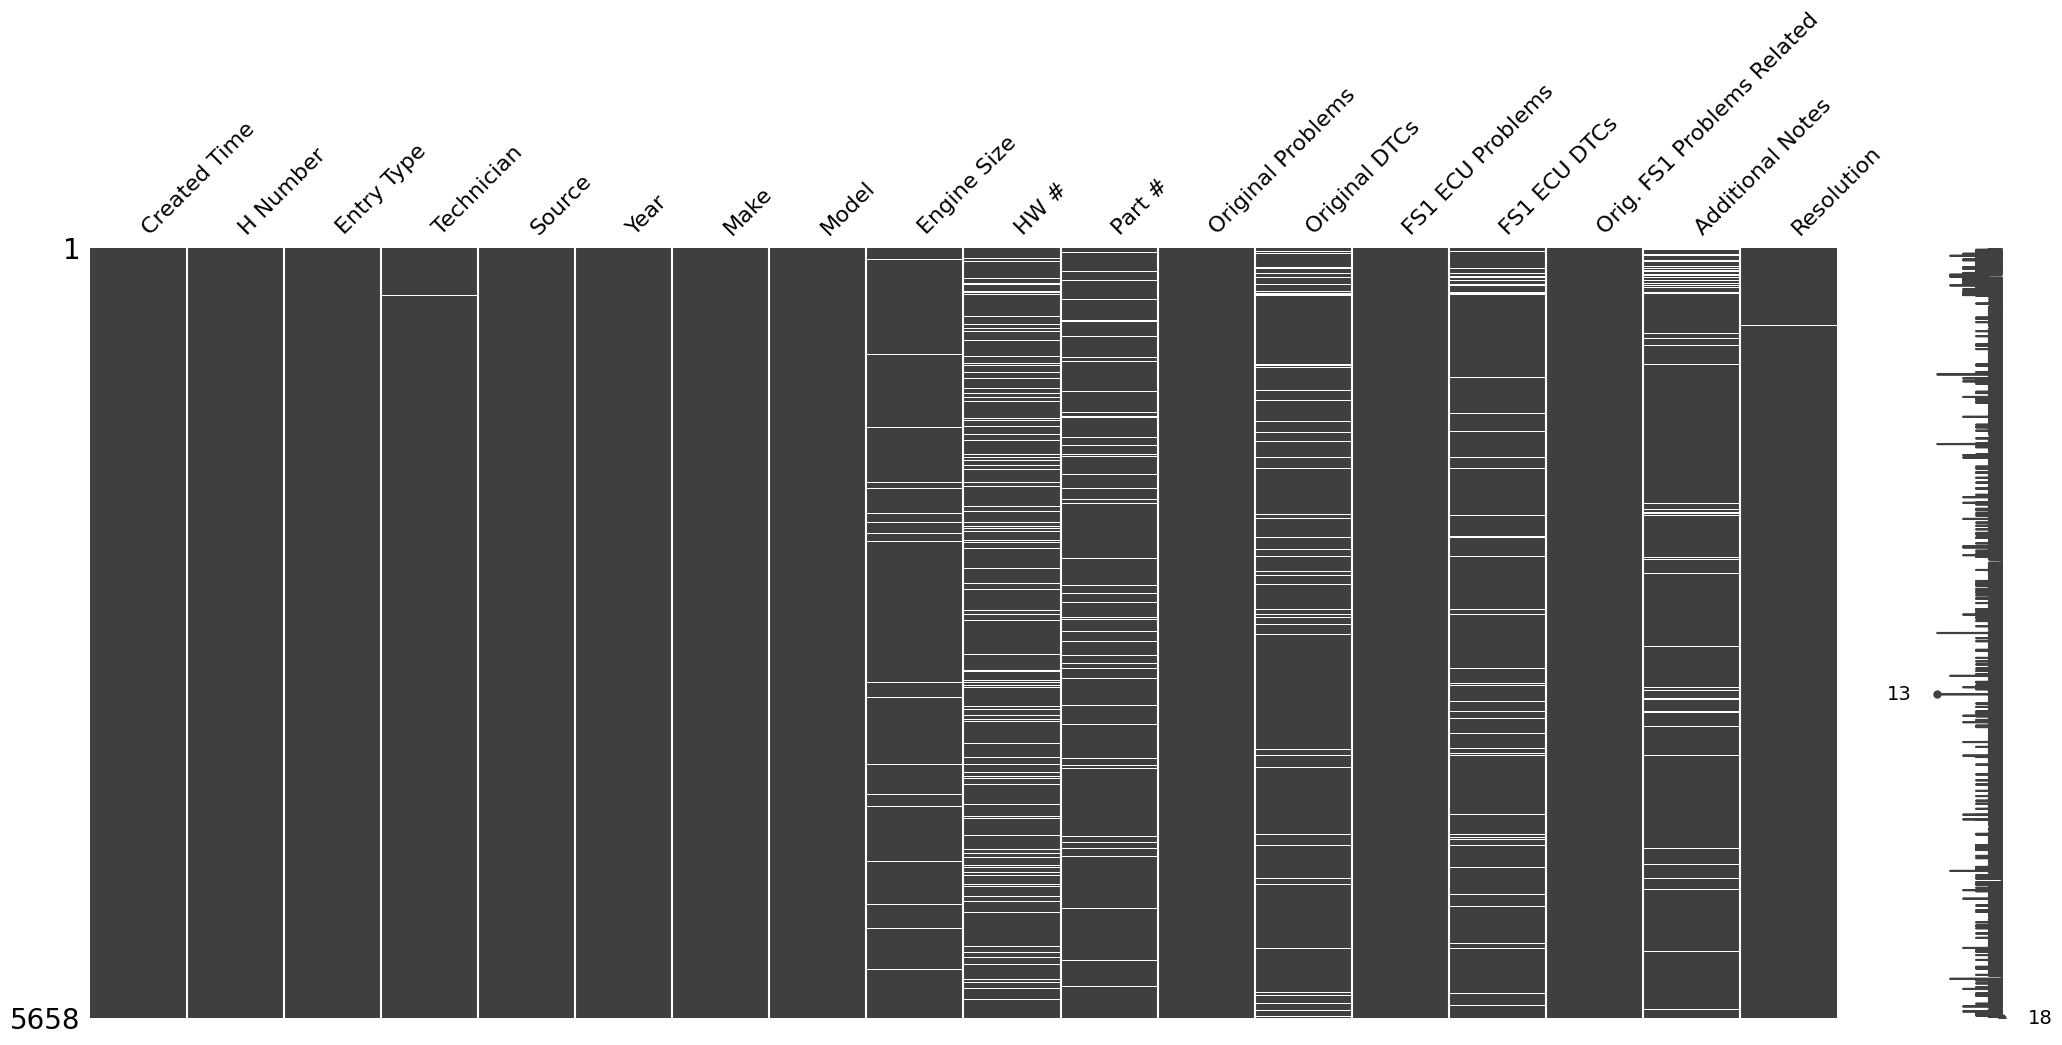

In [178]:
# Check the spread on the chart
mso.matrix(df_prescreen_cleaned)

In [ ]:
# Convert the full dataset to csv file format
df_prescreen_cleaned.to_csv("C:\Language_Projects\Language_Projects\Python\Flagship_1\automotive_diagnostic_data_cleaning\data_cleaned\df_prescreen_cleaned.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Weverson Barbieri\AppData\Local\Temp\ipykernel_15836\339688756.py:2: SyntaxWarning: invalid escape sequence '\L'
  df_prescreen_cleaned.to_csv("C:\Language_Projects\Language_Projects\Python\Flagship_1\\automotive_diagnostic_data_analysis\data\data_cleaned\df_prescreen_cleaned.csv", index=False)
